In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
train = pd.read_csv(r"C:\Users\User\Desktop\Sendy Project\Train.csv")
test = pd.read_csv(r"C:\Users\User\Desktop\Sendy Project\Test.csv")
variables = pd.read_csv(r"C:\Users\User\Desktop\Sendy Project\VariableDefinitions.csv")
riders = pd.read_csv(r"C:\Users\User\Desktop\Sendy Project\Riders.csv")

In [51]:
test.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [52]:
variables.head()

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a pl...
1,Vehicle Type,"For this competition limited to bikes, however..."
2,Platform Type,"Platform used to place the order, there are 4 ..."
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31


In [53]:
riders.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [54]:
train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [55]:
train.shape

(21201, 29)

In [56]:
train.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


In [57]:
train.dtypes

Order No                                      object
User Id                                       object
Vehicle Type                                  object
Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)     

In [58]:
#Changing Date and Time columns to Date Time Type
train['Placement - Time'] = pd.to_datetime(train['Placement - Time'])
train['Confirmation - Time'] = pd.to_datetime(train['Confirmation - Time'])
train['Pickup - Time'] = pd.to_datetime(train['Pickup - Time'])
train['Arrival at Pickup - Time'] = pd.to_datetime(train['Arrival at Pickup - Time'])
train['Arrival at Destination - Time'] = pd.to_datetime(train['Arrival at Destination - Time'])
train.dtypes

Order No                                             object
User Id                                              object
Vehicle Type                                         object
Platform Type                                         int64
Personal or Business                                 object
Placement - Day of Month                              int64
Placement - Weekday (Mo = 1)                          int64
Placement - Time                             datetime64[ns]
Confirmation - Day of Month                           int64
Confirmation - Weekday (Mo = 1)                       int64
Confirmation - Time                          datetime64[ns]
Arrival at Pickup - Day of Month                      int64
Arrival at Pickup - Weekday (Mo = 1)                  int64
Arrival at Pickup - Time                     datetime64[ns]
Pickup - Day of Month                                 int64
Pickup - Weekday (Mo = 1)                             int64
Pickup - Time                           

In [59]:
train['Placement - Time'].unique()

array(['2020-07-11T09:35:46.000000000', '2020-07-11T11:16:16.000000000',
       '2020-07-11T12:39:25.000000000', ...,
       '2020-07-11T16:48:16.000000000', '2020-07-11T17:02:09.000000000',
       '2020-07-11T17:06:16.000000000'], dtype='datetime64[ns]')

In [60]:
#Extracting hours and mins from time
train['Placement - Hours'] = train['Placement - Time'].dt.hour
train['Placement - Mins'] = train['Placement - Time'].dt.minute
train['Confirmation - Hours'] = train['Confirmation - Time'].dt.hour
train['Confirmation - Mins'] = train['Confirmation - Time'].dt.minute
train['Pickup - Hours'] = train['Pickup - Time'].dt.hour
train['Pickup - Mins'] = train['Pickup - Time'].dt.minute
train['Arrival at Pickup - Hours'] = train['Arrival at Pickup - Time'].dt.hour
train['Arrival at Pickup - Mins'] = train['Arrival at Pickup - Time'].dt.minute
train['Arrival at Destination - Hours'] = train['Arrival at Destination - Time'].dt.hour
train['Arrival at Destination - Mins'] = train['Arrival at Destination - Time'].dt.minute

In [61]:
train.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival', 'Placement - Hours', 'Placement - Mins',
       'Confirmation - Hours', 'Confirmation - Mins', 'Pickup - Hours',
       'Pickup - Mins', 'Arrival at Pickup - Hours',
       'Arrival at Pickup

In [62]:
len(train)

21201

In [63]:
train.isnull()
train.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [64]:
#Data Visualizations of Train Data Set

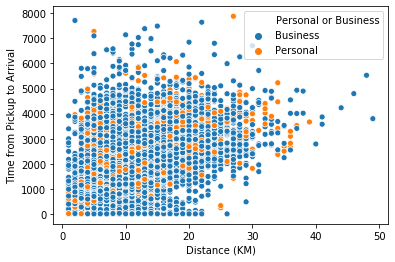

In [65]:
#Looking at time v dist according to order type
timevdisttype = sns.scatterplot(x="Distance (KM)", y="Time from Pickup to Arrival",data=train, hue="Personal or Business")

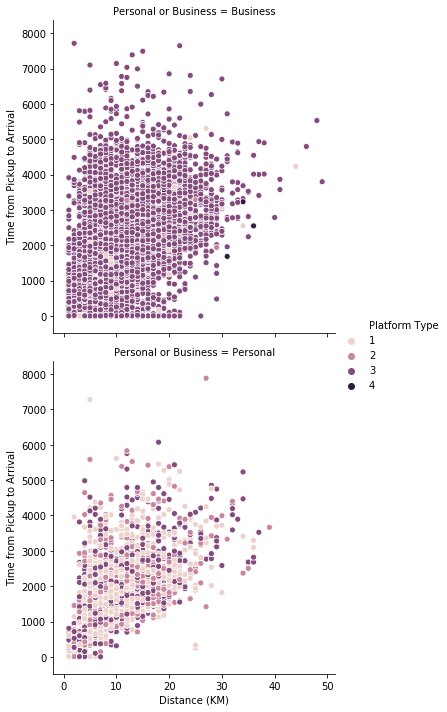

In [66]:
detailtimevdist = sns.relplot(x="Distance (KM)", y="Time from Pickup to Arrival",data=train, kind='scatter', hue='Platform Type', row='Personal or Business')

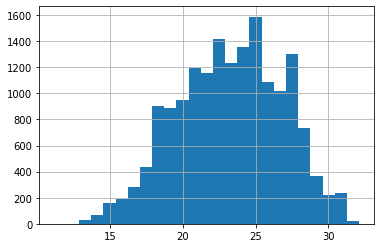

In [67]:
#Looking at the temperature distribution
temp_hist = train['Temperature'].hist(bins=25)

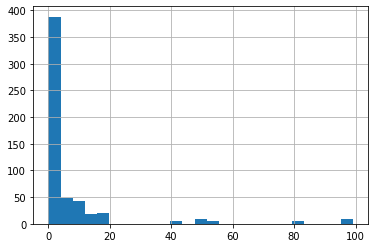

In [68]:
#Percipitation distribution
perci_hist = train['Precipitation in millimeters'].hist(bins=25)

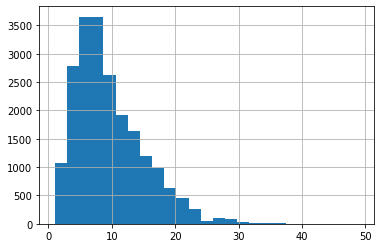

In [69]:
#Distribution of Distance
dist_hist = train['Distance (KM)'].hist(bins=25)

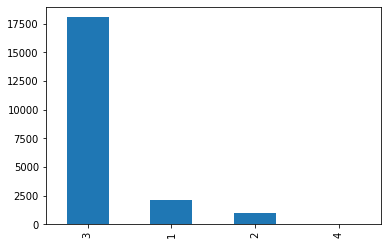

In [70]:
#Looking at Platform Type
platdist = train['Platform Type'].value_counts().plot(kind='bar')

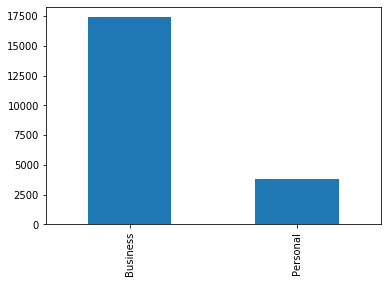

In [71]:
#Numbers of Business V Personal
busvpersonal = train['Personal or Business'].value_counts().plot(kind='bar')

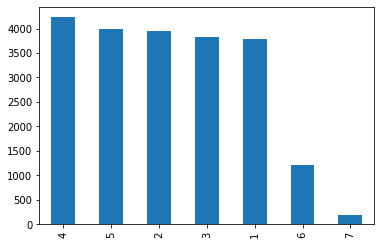

In [72]:
#Days of the week
day_plot = train['Placement - Weekday (Mo = 1)'].value_counts().plot(kind='bar')

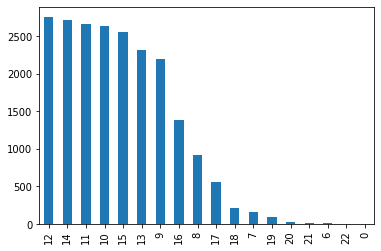

In [73]:
#Placement of the week
place_plot = train['Placement - Hours'].value_counts().plot(kind='bar')

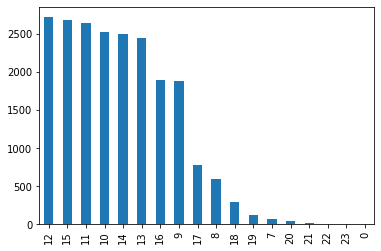

In [74]:
#Arrival time
arrival_plot = train['Arrival at Pickup - Hours'].value_counts().plot(kind='bar')

In [75]:
#Speed = distance/time
train['Total time (Min)'] = train['Time from Pickup to Arrival']/60
train['Total time (Hr)'] = train['Time from Pickup to Arrival']/3600
train['Speed (Km/Hr)'] = train['Distance (KM)']/train['Total time (Hr)']
train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Confirmation - Mins,Pickup - Hours,Pickup - Mins,Arrival at Pickup - Hours,Arrival at Pickup - Mins,Arrival at Destination - Hours,Arrival at Destination - Mins,Total time (Min),Total time (Hr),Speed (Km/Hr)
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,2020-07-11 09:35:46,9,5,...,40,10,27,10,4,10,39,12.416667,0.206944,19.328859
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,2020-07-11 11:16:16,12,5,...,23,11,44,11,40,12,17,33.216667,0.553611,28.901154
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,2020-07-11 12:39:25,30,2,...,42,12,53,12,49,13,0,7.583333,0.126389,23.736264
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,2020-07-11 09:25:34,15,5,...,26,9,43,9,37,10,5,22.350000,0.372500,24.161074
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,2020-07-11 09:55:18,13,1,...,56,10,5,10,3,10,25,20.233333,0.337222,26.688633


In [76]:
train['Speed (Km/Hr)'].describe()

count    21201.000000
mean       249.305379
std       1905.297307
min          0.920245
25%         16.463415
50%         23.064602
75%         30.288462
max      61200.000000
Name: Speed (Km/Hr), dtype: float64

In [107]:
#Changing to category data type to do a pair plot
train['Placement - Weekday (Mo = 1)'] = train['Placement - Weekday (Mo = 1)'].astype('category')
train.columns
#Making a new table for pair plot
newtrain = train.drop(['Order No', 'User Id', 'Vehicle Type','Placement - Day of Month','Placement - Time','Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
                       'Confirmation - Time', 'Arrival at Pickup - Day of Month','Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
                       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time','Arrival at Destination - Day of Month',
                       'Arrival at Destination - Weekday (Mo = 1)','Arrival at Destination - Time','Pickup Lat', 'Pickup Long',
                       'Destination Lat', 'Destination Long', 'Rider Id','Time from Pickup to Arrival', 'Placement - Hours', 'Placement - Mins',
                       'Confirmation - Hours', 'Confirmation - Mins', 'Pickup - Hours','Pickup - Mins', 'Arrival at Pickup - Hours',
                       'Arrival at Pickup - Mins', 'Arrival at Destination - Hours','Arrival at Destination - Mins', 'Total time (Min)','Personal or Business','Temperature',
                       'Precipitation in millimeters','Platform Type'],axis=1)
newtrain.describe()
newtrain.dropna()
newtrain.shape
newtrain.dtypes

Placement - Weekday (Mo = 1)    category
Distance (KM)                      int64
Total time (Hr)                  float64
Speed (Km/Hr)                    float64
dtype: object

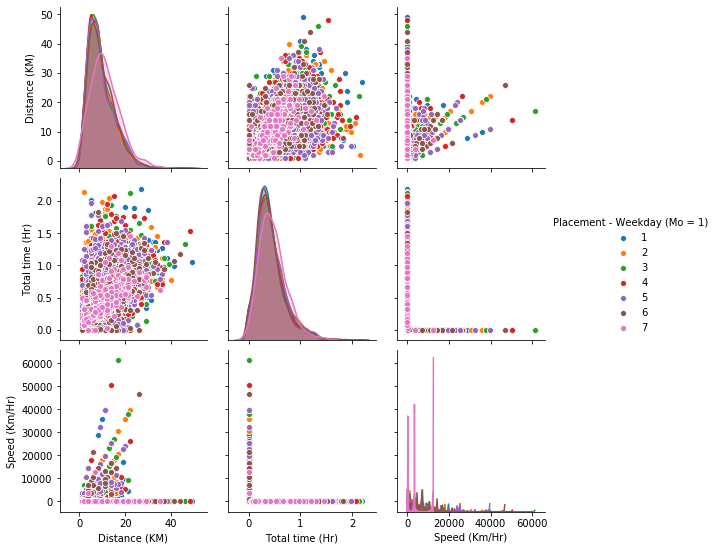

In [108]:
#Lets try a pair plot
pp = sns.pairplot(newtrain,hue='Placement - Weekday (Mo = 1)')